# How does the maximum length effect blast and diamond in terms of coputational cost?

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

In [79]:
df = pd.read_csv('alignment_cost.csv')

In [80]:
print(list(df.columns))

['Experiment', 'rev', 'typ', 'Created', 'parent', 'State', 'Executor', 'n_have_bacdive', 'n_have_growth_temp', 'n_have_ogt', 'n_taxa', 'n_meso', 'n_therm', 'n_taxa_with_16srRNA', 'n_total_sequences', 'percent_full_pairwise_16s_blast', 'num_pairs_conservative', 'true_pair_ratio', 'blastp_kg_CO2_per_pair', 'blastp_time_per_pair', 'percent_full_pairwise_blastp', 'apx_co2_per_pair_avg', 'apx_co2_per_pair_std', 'apx_hits_per_pair_avg', 'apx_hits_per_pair_std', 'apx_minutes_per_pair_avg', 'apx_minutes_per_pair_std', 'apx_perc_protein_pairwise', 'params.yaml:get_bacdive_ogt.n_jobs', 'params.yaml:get_bacdive_ogt.n_sample', 'params.yaml:get_protein_sequences.n_jobs', 'params.yaml:get_protein_sequences.n_sample', 'params.yaml:label_taxa.ogt_threshold', 'params.yaml:label_taxa.ogt_determination_method', 'params.yaml:get_16s_blast_scores.n_jobs', 'params.yaml:get_16s_blast_scores.word_size', 'params.yaml:get_16s_blast_scores.gapopen_penalty', 'params.yaml:get_16s_blast_scores.gapextend_penalty', '

In [81]:
df = df[['params.yaml:get_protein_blast_scores.max_protein_length', 'apx_co2_per_pair_avg', 'apx_co2_per_pair_std', 'apx_hits_per_pair_avg', 'apx_hits_per_pair_std', 'apx_minutes_per_pair_avg', 'apx_minutes_per_pair_std', 'apx_perc_protein_pairwise']]

In [82]:
df = df.dropna()

In [83]:
df

,params.yaml:get_protein_blast_scores.max_protein_length,apx_co2_per_pair_avg,apx_co2_per_pair_std,apx_hits_per_pair_avg,apx_hits_per_pair_std,apx_minutes_per_pair_avg,apx_minutes_per_pair_std,apx_perc_protein_pairwise
0,400,0.01148507192234426,0.006521853856799875,141416.5,65514.51420179176,35.62425160097579,17.472092462478514,0.014200781776669003
1,400,0.01148507192234426,0.006521853856799875,141416.5,65514.51420179176,35.62425160097579,17.472092462478514,0.014200781776669003
2,400,0.01148507192234426,0.006521853856799875,141416.5,65514.51420179176,35.62425160097579,17.472092462478514,0.014200781776669003
3,350,0.0072280143031735345,0.003537851226535376,113377.46875,51942.66597986443,22.780825385575493,10.848114027124291,0.014365432410277022
4,350,0.0072280143031735345,0.003537851226535376,113377.46875,51942.66597986443,22.780825385575493,10.848114027124291,0.014365432410277022
5,350,0.0072280143031735345,0.003537851226535376,113377.46875,51942.66597986443,22.780825385575493,10.848114027124291,0.014365432410277022
6,300,0.003534946169504047,0.0017207001680053667,80410.90625,36583.01278564682,11.825339590882262,5.181859929012994,0.014532947868223229
7,300,0.003534946169504047,0.0017207001680053667,80410.90625,36583.01278564682,11.825339590882262,5.181859929012994,0.014532947868223229
8,300,0.003534946169504047,0.0017207001680053667,80410.90625,36583.01278564682,11.825339590882262,5.181859929012994,0.014532947868223229
9,300,0.003534946169504047,0.0017207001680053667,80410.90625,36583.01278564682,11.825339590882262,5.181859929012994,0.014532947868223229


In [84]:
df = df.drop_duplicates(subset=['params.yaml:get_protein_blast_scores.max_protein_length'], keep='first')

In [85]:
df = df[pd.to_numeric(df['apx_co2_per_pair_avg'], errors='coerce').notnull()]

In [86]:
df = df.rename(columns={
    'params.yaml:get_protein_blast_scores.max_protein_length': 'seq length',
    'apx_co2_per_pair_avg': 'CO2 [kg]',
    'apx_minutes_per_pair_avg': 'Time [min]',
    'apx_perc_protein_pairwise': 'Fraction pairwise space',
    
})

In [87]:
df = df.astype(float)

In [90]:
df

,seq length,CO2 [kg],apx_co2_per_pair_std,apx_hits_per_pair_avg,apx_hits_per_pair_std,Time [min],apx_minutes_per_pair_std,Fraction pairwise space
0,400.0,0.011485,0.006522,141416.50000,65514.514202,35.624252,17.472092,0.014201
3,350.0,0.007228,0.003538,113377.46875,51942.665980,22.780825,10.848114,0.014365
6,300.0,0.003535,0.001721,80410.90625,36583.012786,11.825340,5.181860,0.014533
10,250.0,0.008452,0.003581,48557.59375,21666.794596,5.538804,2.379300,0.014595
15,200.0,0.003379,0.001395,25524.25000,11830.729430,2.094178,0.860771,0.014415
16,150.0,0.000879,0.000357,10286.37500,5163.715865,0.623076,0.251195,0.014183
17,100.0,0.000176,0.000083,1961.84375,1204.106150,0.125302,0.046224,0.013415


Text(0.5, 0.98, 'Approximate per pair return on investment')

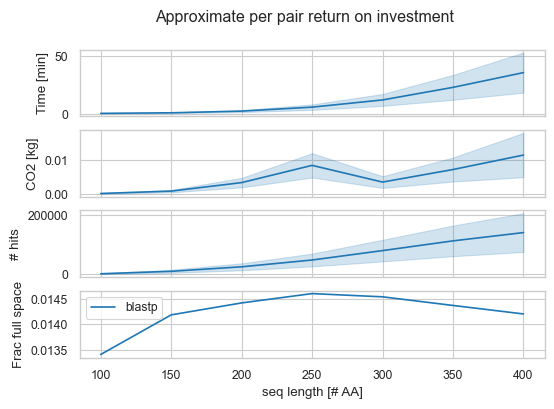

In [97]:
fig, axes = plt.subplots(4,1, figsize=(6,4), sharex=True)
for ax in axes[:3]:
    ax.tick_params(axis='x', bottom=False, which='both')
axes[-1].set_xlabel('seq length [# AA]')

leng=df['seq length']

# do time cost
upper = (df['Time [min]'] + df['apx_minutes_per_pair_std']).values
lower = (df['Time [min]'] - df['apx_minutes_per_pair_std']).values
axes[0].plot(leng, df['Time [min]'].values, c='tab:blue', label = 'blastp')
axes[0].fill_between(leng, upper, lower, color='tab:blue', alpha=.2)
axes[0].set_ylabel('Time [min]')

# do co2
upper = (df['CO2 [kg]'] + df['apx_co2_per_pair_std']).values
lower = (df['CO2 [kg]'] - df['apx_co2_per_pair_std']).values
axes[1].plot(leng, df['CO2 [kg]'].values, c='tab:blue', label = 'blastp')
axes[1].fill_between(leng, upper, lower, color='tab:blue', alpha=.2)
axes[1].set_ylabel('CO2 [kg]')

# return on investment
upper = (df['apx_hits_per_pair_avg'] + df['apx_hits_per_pair_std']).values
lower = (df['apx_hits_per_pair_avg'] - df['apx_hits_per_pair_std']).values
axes[2].plot(leng, df['apx_hits_per_pair_avg'].values, c='tab:blue', label = 'blastp')
axes[2].fill_between(leng, upper, lower, color='tab:blue', alpha=.2)
axes[2].set_ylabel('# hits')

# return on investment
axes[3].plot(leng, df['Fraction pairwise space'].values, c='tab:blue', label = 'blastp')
axes[3].set_ylabel('Frac full space')

plt.legend()
plt.suptitle('Approximate per pair return on investment')

Interestingly we observe a peak in return on investment (eg number of hits we get divided by maximum number of comparisons) but it is negligible, observe the y axis.

## Given the number of pairs we have, assuming the averages, what is the cost and return?
Using blast

In [98]:
N = 13784

In [102]:
print('Total cpu time in days')
df['Time [min]'] * N/60/24

Total cpu time in days


0     341.003253
3     218.063123
6     113.194778
10     53.018666
15     20.045937
16      5.964221
17      1.199415
Name: Time [min], dtype: float64

In [103]:
print('Total human time in days, assuming 30 workers')
df['Time [min]'] * N/60/24/30

Total human time in days, assuming 30 workers


0     11.366775
3      7.268771
6      3.773159
10     1.767289
15     0.668198
16     0.198807
17     0.039980
Name: Time [min], dtype: float64

In [107]:
print('Total carbon cost, in # trans atlantic flights')
df['CO2 [kg]'] * N/1000

Total carbon cost, in # trans atlantic flights


0     0.158310
3     0.099631
6     0.048726
10    0.116507
15    0.046570
16    0.012114
17    0.002423
Name: CO2 [kg], dtype: float64

In [106]:
print('Total number of hits for coservative database, in millions')
df['apx_hits_per_pair_avg'] * N/1e6

Total number of hits for coservative database, in millions


0     1949.285036
3     1562.795029
6     1108.383932
10     669.317872
15     351.826262
16     141.787393
17      27.042054
Name: apx_hits_per_pair_avg, dtype: float64